## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## 1. Compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

In [2]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

def loadCoefficients():
    dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    
    return mtx, dist

def undistortImage(image, mtx, dist):
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    return undistorted

# mtx, dist = loadCoefficients()
# undistort_chess = undistortImage(img, mtx, dist)
# cv2.imwrite('output_images/undistorted_calibration2.jpg',undistort_chess)

# undistort_chess = cv2.cvtColor(undistort_chess, cv2.COLOR_BGR2RGB)
# # Visualize undistortion
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# ax1.imshow(img)
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(undistort_chess)
# ax2.set_title('Undistorted Image', fontsize=30)

### Pipeline (single images)
### 1. Test undistortion on an image

In [3]:
# img = cv2.imread('test_images/test2.jpg')
# img_size = (img.shape[1], img.shape[0])


# undistorted_test = cv2.undistort(img, mtx, dist, None, mtx)
# cv2.imwrite('output_images/undistorted_test2.jpg',undistorted_test)

# # Visualize undistortion
# #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# f, (ax1, ax2) = plt.subplots(2, figsize=(40,20))
# ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(cv2.cvtColor(undistorted_test, cv2.COLOR_BGR2RGB))
# ax2.set_title('Undistorted Image', fontsize=30)

### 2. Create a thresholded binary image.

In [4]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=20, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    else:
        return None
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    
    return sbinary

In [5]:
# Run the function
# grad_binary = abs_sobel_thresh(undistorted_test, orient='x', sobel_kernel=5, thresh=(20, 100))
# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# f.tight_layout()
# ax1.imshow(cv2.cvtColor(undistorted_test, cv2.COLOR_BGR2RGB))
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(grad_binary, cmap='gray')
# ax2.set_title('Thresholded Gradient', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [6]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Calculate the magnitude 
    abs_sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    
    return sbinary

In [7]:
# Run the function
# mag_binary = mag_thresh(undistorted_test, sobel_kernel=3, mag_thresh=(30, 100))
# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# f.tight_layout()
# ax1.imshow(cv2.cvtColor(undistorted_test, cv2.COLOR_BGR2RGB))
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(mag_binary, cmap='gray')

In [8]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)    
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # 5) Create a binary mask where direction thresholds are met
    sbinary = np.zeros_like(grad_dir)
    sbinary[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
    return sbinary

In [9]:
# # Run the function
# dir_binary = dir_threshold(undistorted_test, sobel_kernel=15, thresh=(0.7, 1.3))
# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# f.tight_layout()
# ax1.imshow(cv2.cvtColor(undistorted_test, cv2.COLOR_BGR2RGB))
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(dir_binary, cmap='gray')
# ax2.set_title('Thresholded Grad. Dir.', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Pipeline to get combined thresholds binary

### Use HLS, Combined color and gradient thresholds for lane detection.

In [10]:
# A function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    S = hls[:,:,2]
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    return binary

In [11]:
# result_binary = hls_select(undistorted_test, thresh=(170, 255))

# # Plotting thresholded images
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# ax1.set_title('Stacked thresholds')
# ax1.imshow(cv2.cvtColor(undistorted_test, cv2.COLOR_BGR2RGB))

# ax2.set_title('Combined S channel and gradient thresholds')
# ax2.imshow(result_binary, cmap='gray')

In [12]:
def thresholdPipeline(image, ksize=3):
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(50, 255))
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(50, 255))
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(50, 255))
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
    hls_binary = hls_select(image, thresh=(170, 255))
    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | hls_binary == 1] = 1
    
    return combined


In [13]:
# Run the function
# testThreshold = thresholdPipeline(undistorted_test)
# cv2.imwrite('output_images/binary_combined_straight_lines1.jpg',testThreshold)
# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# f.tight_layout()
# ax1.imshow(cv2.cvtColor(undistorted_test, cv2.COLOR_BGR2RGB))
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(testThreshold, cmap='gray')
# ax2.set_title('Combined Thresholds', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Perspective transform
Given the thresholded binary image, the next step is to perform a perspective transform. The goal is to transform the image such that we get a "bird's eye view" of the lane, which enables us to fit a curved line to the lane lines (e.g. polynomial fit). Another thing this accomplishes is to "crop" an area of the original image that is most likely to have the lane line pixels.

To accomplish the perspective transform, I use OpenCV's getPerspectiveTransform() and warpPerspective() functions. I hard-code the source and destination points for the perspective transform. The source and destination points were visually determined by manual inspection, although an important enhancement would be to algorithmically determine these points.

### 3. Do perspective transform

In [14]:
def warper(img, src, dst):
    # Compute and apply perpective transform
    img_size = (img.shape[1], img.shape[0])
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and invM, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    invM = cv2.getPerspectiveTransform(dst, src)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)  # keep same size as input image

    return warped, M, invM

In [15]:
# img_size = (undistorted_test.shape[1], undistorted_test.shape[0])

# # src = np.float32([(575,464),
# #                   (710,464), 
# #                   (320,682), 
# #                   (1100,682)])
# # dst = np.float32([(450,0),
# #                   (img_size[0]-450,0),
# #                   (450,img_size[1]),
# #                   (img_size[0]-450,img_size[1])])
# # Define 4 source points
# src = np.float32([[250, img.shape[0]-25], [575, 460], 
#                   [700, 460], [1150, img.shape[0]-25]])
# # Define 4 destination points
# dst = np.float32([[320, img.shape[0]-25], [320, 0], 
#                   [960, 0], [960, img.shape[0]-25]])
# print('---------------------------------------------')
# print(src)
# print('---------------------------------------------')
# print(dst)
# print('---------------------------------------------')
# top_down, M, invM = warper(undistorted_test, src, dst)

# cv2.imwrite("output_images/original_undistorted.jpg", undistorted_test)
# cv2.imwrite("output_images/original_undistorted_wraped.jpg", top_down)

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# f.tight_layout()

# x = [src[0][0],src[1][0],src[2][0],src[3][0],src[0][0]]
# y = [src[0][1],src[1][1],src[2][1],src[3][1],src[0][1]]
# ax1.plot(x, y, color='red', alpha=0.4, linewidth=5, solid_capstyle='round', zorder=2)
# ax1.set_ylim([img_size[1],0])
# ax1.set_xlim([0,img_size[0]])
# ax1.imshow(cv2.cvtColor(undistorted_test, cv2.COLOR_BGR2RGB))
# ax1.set_title('Original Undistorted Image', fontsize=30)

# x = [dst[0][0],dst[1][0],dst[2][0],dst[3][0],dst[0][0]]
# y = [dst[0][1],dst[1][1],dst[2][1],dst[3][1],dst[0][1]]
# ax2.plot(x, y, color='red', alpha=0.4, linewidth=5, solid_capstyle='round', zorder=2)
# ax2.imshow(cv2.cvtColor(top_down, cv2.COLOR_BGR2RGB))
# ax2.set_title('Warped Image', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [16]:
# top_binary, M, invM = warper(testThreshold, src, dst)

# cv2.imwrite("output_images/binary_original.jpg", testThreshold*255)
# cv2.imwrite("output_images/binary_wraped.jpg", top_binary*255)

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# f.tight_layout()
# ax1.imshow(testThreshold, cmap='gray')
# ax1.set_title('Original binary Image', fontsize=30)
# ax2.imshow(top_binary, cmap='gray')
# ax2.set_title('Binary Warped Image', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Polynomial fit
Given the warped binary image from the previous step, I now fit a 2nd order polynomial to both left and right lane lines. In particular, I perform the following:

Calculate a histogram of the bottom half of the image
Partition the image into 9 horizontal slices
Starting from the bottom slice, enclose a 200 pixel wide window around the left peak and right peak of the histogram (split the histogram in half vertically)
Go up the horizontal window slices to find pixels that are likely to be part of the left and right lanes, recentering the sliding windows opportunistically
Given 2 groups of pixels (left and right lane line candidate pixels), fit a 2nd order polynomial to each group, which represents the estimated left and right lane lines
The code to perform the above is in the line_fit() function of 'line_fit.py'.

Since our goal is to find lane lines from a video stream, we can take advantage of the temporal correlation between video frames.

Given the polynomial fit calculated from the previous video frame, one performance enhancement I implemented is to search +/- 100 pixels horizontally from the previously predicted lane lines. Then we simply perform a 2nd order polynomial fit to those pixels found from our quick search. In case we don't find enough pixels, we can return an error (e.g. return None), and the function's caller would ignore the current frame (i.e. keep the lane lines the same) and be sure to perform a full search on the next frame. Overall, this will improve the speed of the lane detector, useful if we were to use this detector in a production self-driving car. The code to perform an abbreviated search is in the tune_fit() function of 'line_fit.py'.

Another enhancement to exploit the temporal correlation is to smooth-out the polynomial fit parameters. The benefit to doing so would be to make the detector more robust to noisy input. I used a simple moving average of the polynomial coefficients (3 values per lane line) for the most recent 5 video frames. The code to perform this smoothing is in the function add_fit() of the class Line in the file 'Line.py'. The Line class was used as a helper for this smoothing function specifically, and Line instances are global objects in 'line_fit.py'.

Below is an illustration of the output of the polynomial fit, for our original example image. For all images in 'test_images/*.jpg', the polynomial-fit-annotated version of that image is saved in 'output_images/polyfit_*.png'.

In [17]:
# Load our image
# `mpimg.imread` will load .jpg as 0-255, so normalize back to 0-1
binary_warped = mpimg.imread('output_images/binary_wraped.jpg')/255
print(img.shape)
height, width = img.shape[:-1]

def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[:height//2,:width]

    # TO-DO: Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = hist(binary_warped)

# Visualize the resulting histogram
# plt.imshow(binary_warped[:height//2,:width], cmap='gray')
# plt.plot(histogram)

(720, 1280, 3)


### Sliding Window

With this histogram we are adding up the pixel values along each column in the image. In our thresholded binary image, pixels are either 0 or 1, so the two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines. We can use that as a starting point for where to search for the lines. From that point, we can use a sliding window, placed around the line centers, to find and follow the lines up to the top of the frame.

In [18]:
def find_lane_pixels(binary_warped):
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters,
    # and the dashed lane lines are 10 feet or 3 meters long each.
    # define road width as 700px
    roadWidth = 700
    
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    #print('midpoint = ', midpoint)
    leftx_base = np.argmax(histogram[:midpoint])
    #print('leftx_base = ', leftx_base)
    #rightx_base = np.argmax(histogram[midpoint:]) + midpoint 
    rightx_base = leftx_base + 700 
    #print('rightx_base = ', rightx_base)

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base
    #print(f'Base position for left window: {leftx_current}, for right window: {rightx_base}')

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped, showImg=False):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    if showImg == True:
        # Plots the left and right polynomials on the lane lines
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')

    return left_fit, right_fit, out_img

In [19]:
# binary_warped = mpimg.imread('output_images/binary_wraped.jpg')
# left_fit, right_fit, out_img = fit_polynomial(binary_warped, showImg=True)

# plt.imshow(out_img)

In [20]:
# print(left_fit)
# print(right_fit)

In [21]:
def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped, left_fit, right_fit, showImg=False):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    global leftx
    leftx = nonzerox[left_lane_inds]
    global lefty
    lefty = nonzeroy[left_lane_inds] 
    global rightx
    rightx = nonzerox[right_lane_inds]
    global righty
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    #global ploty
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    if showImg == True:
        # Plot the polynomial lines onto the image
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        ## End visualization steps ##

        return left_fitx, right_fitx, ploty, result
    else:
        return left_fitx, right_fitx, ploty

In [22]:
# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
#left_fitx, right_fitx, ploty, result = search_around_poly(binary_warped, left_fit, right_fit, showImg=True)

# View your output
#plt.imshow(result)

In [23]:
def measure_curvature_pixels(img, left_fit, right_fit):
    '''
    Calculates the curvature of polynomial functions in pixels.
    '''
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    height = img.shape[0]
    ploty = np.linspace(0, height-1, num=height)
    y_eval = np.max(ploty)
    
    ##### Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    return left_curverad, right_curverad


# Calculate the radius of curvature in pixels for both lane lines
#left_curverad, right_curverad = measure_curvature_pixels(binary_warped, left_fit, right_fit)
#print(left_curverad, right_curverad)

In [24]:
def measure_curvature_real(img, leftx, lefty, rightx, righty):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    height = img.shape[0]
    width = img.shape[1]
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30./height # meters per pixel in y dimension
    xm_per_pix = 3.7/width # meters per pixel in x dimension
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    ploty = np.linspace(0, height-1, num=height)
    y_eval = np.max(ploty)
    
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    
    ##### Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    # Calculate x bottom position for y for left lane
    left_lane_bottom = (left_fit_cr[0] * (y_eval * ym_per_pix) ** 2 + 
                        left_fit_cr[1] * (y_eval * ym_per_pix) + left_fit_cr[2])
    # Calculate x bottom position for y for right lane
    right_lane_bottom = (right_fit_cr[0] * (y_eval * ym_per_pix) ** 2 + 
                         right_fit_cr[1] * (y_eval * ym_per_pix) + right_fit_cr[2])
    # Calculate the mid point of the lane
    lane_midpoint = float(right_lane_bottom + left_lane_bottom) / 2
    # Calculate the image center in meters from left edge of the image
    image_mid_point_in_meter = width/2 * xm_per_pix
    # Positive value indicates vehicle on the right side of lane center, else on the left.
    lane_deviation = (image_mid_point_in_meter - lane_midpoint)
    
    return left_curverad, right_curverad, lane_deviation


# Calculate the radius of curvature in meters for both lane lines
#left_curverad, right_curverad, lane_deviation = measure_curvature_real(binary_warped, leftx, lefty, rightx, righty)

#print(left_curverad, 'm', right_curverad, 'm', lane_deviation, 'm')

In [25]:
def drawLane(img, binary, left_fit, right_fit, invM):
    new_img = np.copy(img)

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    points_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    points_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    points = np.hstack((points_left, points_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([points]), (255, 0, 0))
    #cv2.polylines(color_warp, np.int32([points_left]), isClosed=False, color=(255,0,0), thickness=15)
    #cv2.polylines(color_warp, np.int32([points_right]), isClosed=False, color=(0,0,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, invM, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)

    return result

In [26]:
#out_test = drawLane(undistorted_test, top_binary, left_fit, right_fit, invM)
#plt.figure(figsize = (40,20))
#plt.imshow(cv2.cvtColor(out_test, cv2.COLOR_BGR2RGB))

In [27]:
def drawData(img, curvature_left, curvature_right, lane_deviation):
    result = np.copy(img)
    font = cv2.FONT_HERSHEY_SIMPLEX
    curv_l_label = 'Left line Curvature: {:.0f} m.'.format(curvature_left)
    curv_r_label = 'Right line Curvature: {:.0f} m.'.format(curvature_right)
    deviation_label = 'Vehicle Deviation: {:.3f} m.'.format(lane_deviation)

    cv2.putText(result, curv_l_label, (30, 50), font, 1, (255,255,255), 2)
    cv2.putText(result, curv_r_label, (30, 100), font, 1, (255,255,255), 2)
    cv2.putText(result, deviation_label, (30, 150), font, 1, (255,255,255), 2)

    return result

In [28]:
#out_test = drawData(out_test, left_curverad, right_curverad, lane_deviation)
#plt.figure(figsize = (40,20))
#plt.imshow(cv2.cvtColor(out_test, cv2.COLOR_BGR2RGB))

In [29]:
mtx, dist = loadCoefficients()

def drawLanePipeline(imagePip):
    undistortedPip = undistortImage(imagePip, mtx, dist)
    thresholdedPip = thresholdPipeline(undistortedPip)
    imgSizePip = imagePip.shape
    # Define 4 source points
    srcPip = np.float32([[250, imgSizePip[0]-25], [575, 460], 
                      [700, 460], [1150, imgSizePip[0]-25]])
    # Define 4 destination points
    dstPip = np.float32([[320, imgSizePip[0]-25], [320, 0], 
                      [960, 0], [960, imgSizePip[0]-25]])
    #print(dst)
    binaryWarpedPip, Mpip, invMpip = warper(thresholdedPip, srcPip, dstPip)
    leftFitPip, rightFitPip, outImgPip = fit_polynomial(binaryWarpedPip)
    if leftFitPip is not None and rightFitPip is not None:
        leftFitx, rightFitx, ploty = search_around_poly(binaryWarpedPip, leftFitPip, rightFitPip)
        left_curverad, right_curverad, lane_deviation = measure_curvature_real(binary_warped, leftx, lefty, rightx, righty)
        resultPip = drawLane(undistortedPip, binaryWarpedPip, leftFitPip, rightFitPip, invMpip)
        resultPip = drawData(resultPip, left_curverad, right_curverad, lane_deviation)
        return resultPip

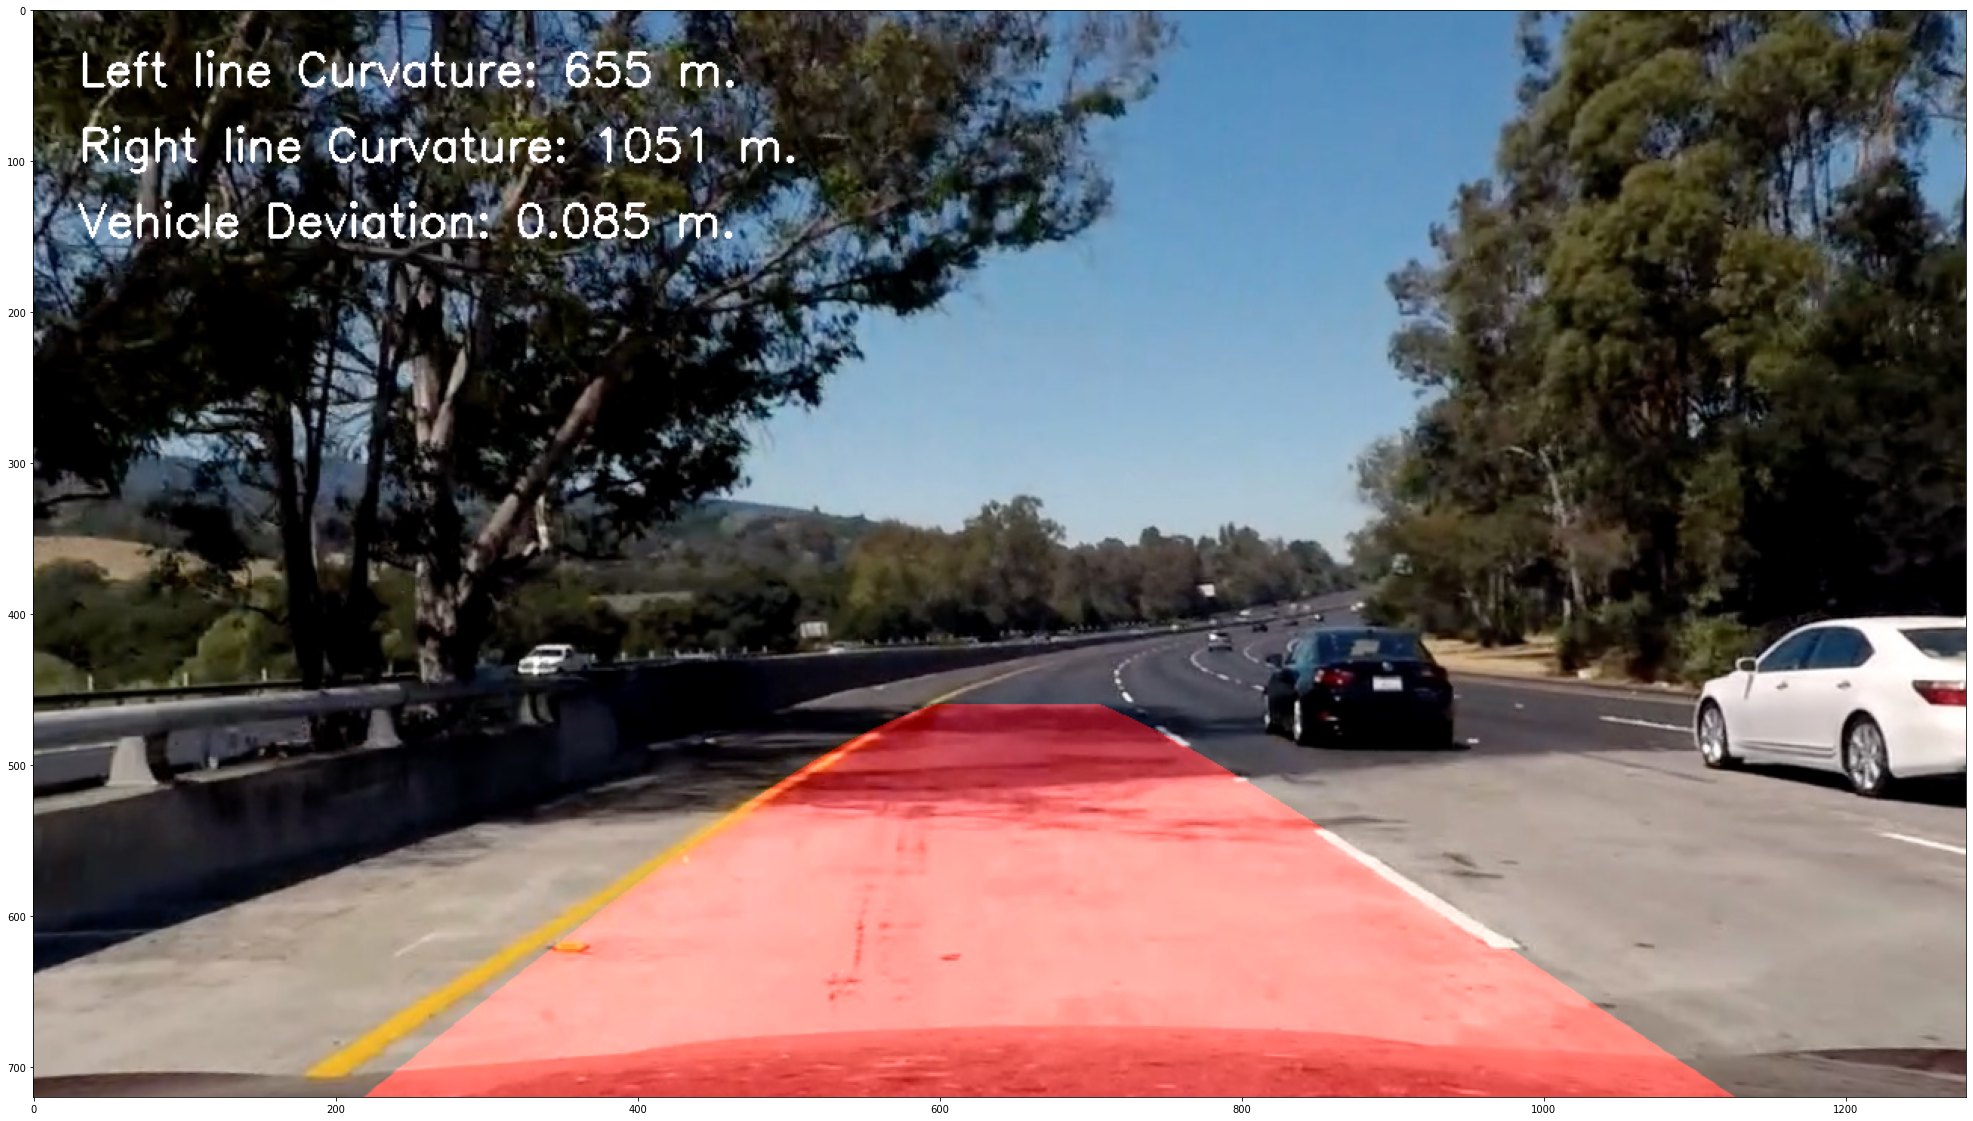

In [31]:
img = cv2.imread('test_images/test5.jpg')
test = drawLanePipeline(img)
plt.figure(figsize = (40,20))
plt.imshow(test)

In [35]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

output_video = 'project_video_processed-02.mp4'
clip1 = VideoFileClip("project_video.mp4")#.subclip(0,3)
video_clip = clip1.fl_image(drawLanePipeline)
%time video_clip.write_videofile(output_video, audio=False)

t:   0%|                                                                            | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video project_video_processed-02.mp4.
Moviepy - Writing video project_video_processed-02.mp4




t:  11%|██████▉                                                           | 133/1260 [00:30<04:18,  4.36it/s, now=None]


t:  21%|█████████████▉                                                    | 265/1260 [01:00<03:56,  4.20it/s, now=None]


t:  32%|████████████████████▊                                             | 397/1260 [01:32<03:25,  4.21it/s, now=None]


t:  42%|███████████████████████████▋                                      | 529/1260 [02:03<02:49,  4.31it/s, now=None]


t:  48%|███████████████████████████████▋                                  | 606/1260 [02:20<02:25,  4.49it/s, now=None]

TypeError: expected non-empty vector for x

In [36]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))